# SGD Models

Before Running this notebook, run the notebook 'Pre-Processed.ipynb' (Located in cmse492_project\Data\Pre-Processing) which will create the processed dataframe file 'processed.csv'. Place a copy of that file into this directory (cmse492_project\Models\SGDModel)

In [31]:
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, recall_score, f1_score
from tqdm import tqdm
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

**I. Train-Test Split Data**

In [23]:
df = pd.read_csv('processed.csv')
X = df.drop(['Class', 'Time', 'TransactionTime'], axis=1)  
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

**II. SGD Pipeline with Different Loss Functions**

In [26]:
loss_functions = ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron']

results = {}

for loss in tqdm(loss_functions, desc="Testing Loss Functions"):

    pipeline_sgd = make_pipeline(
        StandardScaler(),
        SGDClassifier(loss=loss, class_weight='balanced', random_state=42, max_iter=1000, tol=1e-3)
    )

    pipeline_sgd.fit(X_train, y_train)
    y_pred_probs = pipeline_sgd.named_steps['sgdclassifier'].decision_function(X_test)
    y_pred = pipeline_sgd.predict(X_test)

    # Metrics
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs, pos_label=1)
    auroc = auc(fpr, tpr)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    # Store results
    results[loss] = {'AUROC': auroc, 'Recall': recall, 'F1 Score': f1}

Testing Loss Functions:   0%|                                                                    | 0/5 [00:00<?, ?it/s]C:\Users\alice\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
Testing Loss Functions:  20%|████████████                                                | 1/5 [00:04<00:16,  4.11s/it]C:\Users\alice\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
Testing Loss Functions:  40%|████████████████████████                                    | 2/5 [00:10<00:15,  5.19s/it]C:\Users\alice\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
Testing Loss Functions:  60%|██████████████████████████

**III. Loss Function Comparisons**

In [25]:
print("Results for each loss function:")
for loss, metrics in results.items():
    print(f"Loss: {loss} - AUROC: {metrics['AUROC']:.4f}, Recall: {metrics['Recall']:.4f}, F1 Score: {metrics['F1 Score']:.4f}")

Results for each loss function:
Loss: hinge - AUROC: 0.6714, Recall: 0.9184, F1 Score: 0.0899
Loss: log_loss - AUROC: 0.6841, Recall: 0.9184, F1 Score: 0.0970
Loss: modified_huber - AUROC: 0.6831, Recall: 0.9184, F1 Score: 0.0978
Loss: squared_hinge - AUROC: 0.7579, Recall: 0.9184, F1 Score: 0.0424
Loss: perceptron - AUROC: 0.7050, Recall: 0.9184, F1 Score: 0.0291


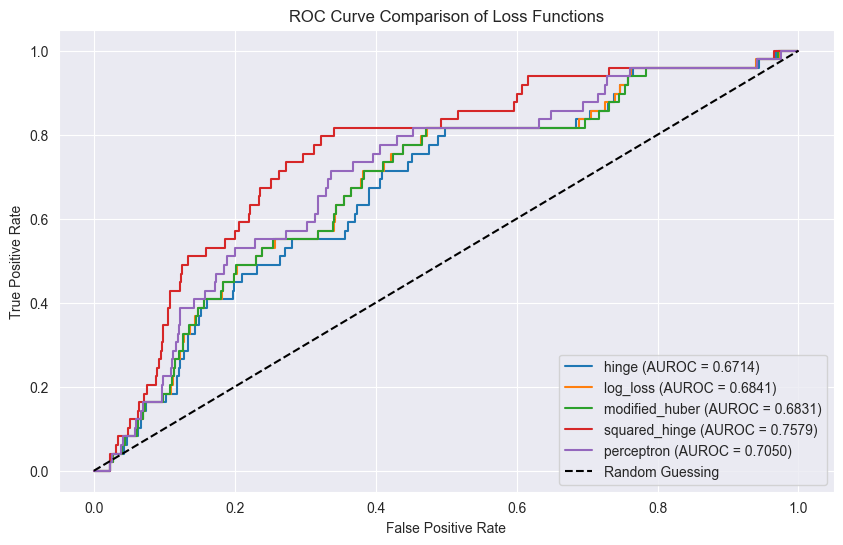

In [34]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
for loss in results:
    pipeline_sgd = make_pipeline(
        StandardScaler(),
        SGDClassifier(loss=loss, class_weight='balanced', random_state=42, max_iter=1000, tol=1e-3)
    )
    pipeline_sgd.fit(X_train, y_train)
    y_pred_probs = pipeline_sgd.named_steps['sgdclassifier'].decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs, pos_label=1)
    plt.plot(fpr, tpr, label=f"{loss} (AUROC = {results[loss]['AUROC']:.4f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of Loss Functions")
plt.legend(loc="lower right")
plt.show()